In [1]:
import matplotlib_inline.config
import numpy as np
import tensorflow_datasets as tfds
import tensorflow as tf

import matplotlib.pyplot as plt

# Download the 'cats_vs_dogs' dataset

In [4]:
try:
    setattr(tfds.image_classification.cats_vs_dogs, '_URL', "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip")
except AttributeError:
    try:
        setattr(tfds.image.cats_vs_dogs, '_URL', "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip")
    except AttributeError:
        print("Could not set the _URL attribute. Please ensure tensorflow_datasets is installed correctly and check the module path for cats_vs_dogs.")
        # As a last resort, you might need to find the cats_vs_dogs.py file in your
        # tensorflow_datasets installation and modify the _URL variable directly,
        # but this is highly discouraged as it can be overwritten by updates.

ds_train, ds_info = tfds.load(
    'cats_vs_dogs',
    split='train',
    with_info=True,
    as_supervised=True,
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

KeyError: "There is no item named 'PetImages\\\\Cat\\\\0.jpg' in the archive"

In [2]:
ds_train, ds_info = tfds.load(
    'cats_vs_dogs',
    split='train',
    with_info=True,
    as_supervised=True,
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

KeyError: "There is no item named 'PetImages\\\\Cat\\\\0.jpg' in the archive"

In [3]:
class_name = ['cat', 'dog']

In [5]:
ds_train_ = ds_train.shuffle(buffer_size=10000, reshuffle_each_iteration=False)
num_train_examples = int(0.7 * len(ds_train_))
ds_train = ds_train_.take(num_train_examples)
ds_test = ds_train_.skip(num_train_examples)

NameError: name 'ds_train' is not defined

In [5]:
IMG_SIZE = 28
BATCH_SIZE = 64

In [6]:
def preprocess_image(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE), method=tf.image.ResizeMethod.GAUSSIAN)
    image = tf.keras.applications.mobilenet_v2.preprocess_input(image)
    image = tf.reshape(image, [-1])
    return image, tf.one_hot(label, depth=2)

In [7]:
ds_train = ds_train.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)

In [8]:
ds_train = ds_train.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

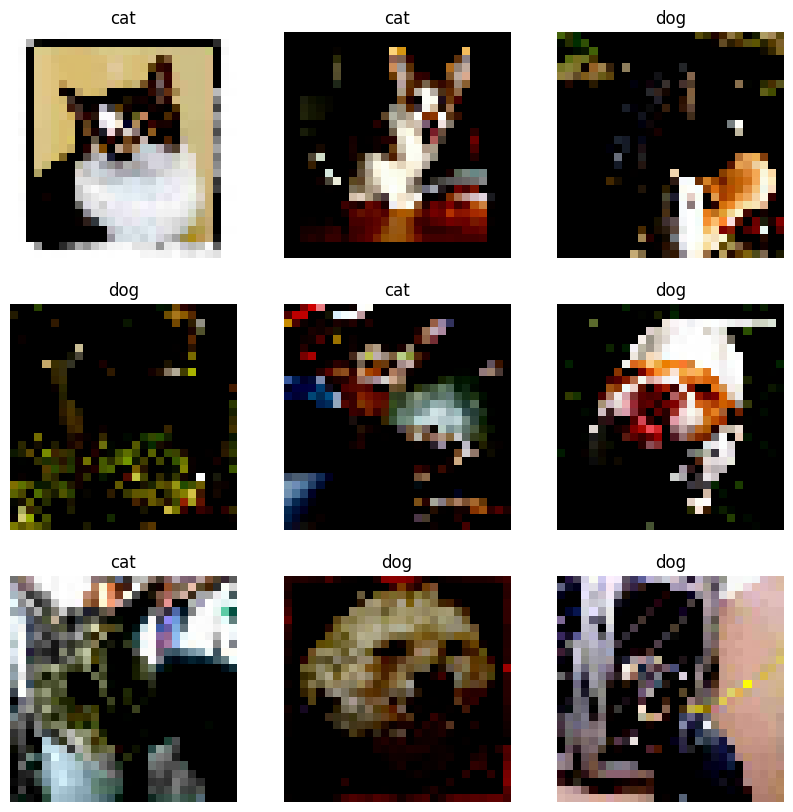

In [9]:
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(ds_test.take(9)):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image[0].numpy().reshape((28, 28, 3)))
    plt.title(class_name[np.argmax(label[0])])
    plt.axis("off")

In [1]:
# TODO change code to the newest Tensorflow API
# TODO 1: change import
from keras.models import Sequential
from keras.layers import Dense, Flatten


model = Sequential()
# TODO 2: add Input layer
# TODO 3: remove `input_shape` param
model.add(Dense(units=64, activation='relu', input_shape=(2352,)))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=2, activation="softmax"))

model.compile(loss='categorical_crossentropy',
              metrics=["accuracy"])
model.summary()


KeyboardInterrupt



In [11]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=["accuracy"])

In [12]:
history = model.fit(ds_train, validation_data=ds_test, epochs=60)

Epoch 1/60
255/255 [==============================] - 15s 39ms/step - loss: 0.6653 - accuracy: 0.5972 - val_loss: 0.6599 - val_accuracy: 0.6075
Epoch 2/60
255/255 [==============================] - 11s 39ms/step - loss: 0.6215 - accuracy: 0.6477 - val_loss: 0.6717 - val_accuracy: 0.6189
Epoch 3/60
255/255 [==============================] - 11s 39ms/step - loss: 0.5865 - accuracy: 0.6814 - val_loss: 0.6820 - val_accuracy: 0.6171
Epoch 4/60
255/255 [==============================] - 11s 39ms/step - loss: 0.5471 - accuracy: 0.7149 - val_loss: 0.6909 - val_accuracy: 0.6305
Epoch 5/60
255/255 [==============================] - 11s 37ms/step - loss: 0.5047 - accuracy: 0.7467 - val_loss: 0.7294 - val_accuracy: 0.6342
Epoch 6/60
255/255 [==============================] - 11s 40ms/step - loss: 0.4566 - accuracy: 0.7765 - val_loss: 0.7910 - val_accuracy: 0.6244
Epoch 7/60
255/255 [==============================] - 11s 39ms/step - loss: 0.4131 - accuracy: 0.8049 - val_loss: 0.8456 - val_accuracy:

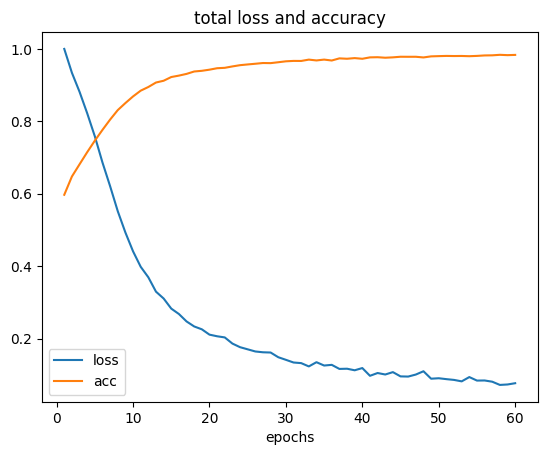

In [13]:
import matplotlib.pyplot as plt
import numpy as np

epoch_array = range(1, len(history.history['loss']) + 1)
loss_array = history.history['loss']
acc_array = history.history['accuracy']

max_loss = max(loss_array)
loss_array = np.array(loss_array) / max_loss

plt.plot(epoch_array, loss_array, label="loss")
plt.plot(epoch_array, acc_array, label="acc")
plt.xlabel("epochs")
plt.title("total loss and accuracy")

plt.legend()
plt.show()

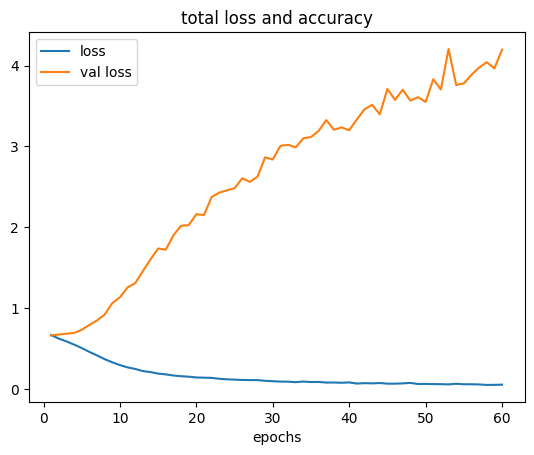

In [15]:
epoch_array = range(1, len(history.history['loss']) + 1)
val_loss_array = history.history['val_loss']
loss_array = history.history['loss']

plt.plot(epoch_array, loss_array, label="loss")
plt.plot(epoch_array, val_loss_array, label="val loss")
plt.xlabel("epochs")
plt.title("total loss and accuracy")

plt.legend()
plt.show()

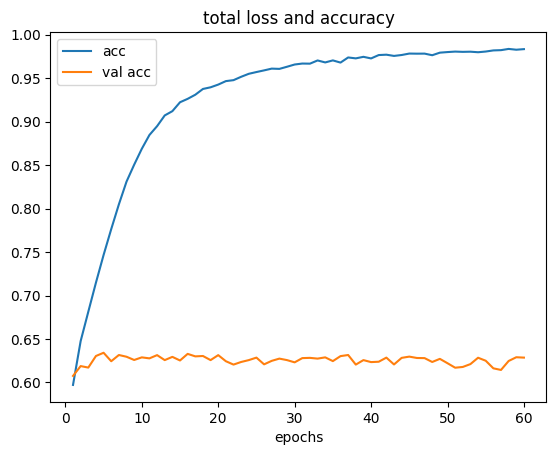

In [16]:
epoch_array = range(1, len(history.history['loss']) + 1)
val_acc_array = history.history['val_accuracy']
acc_array = history.history['accuracy']

plt.plot(epoch_array, acc_array, label="acc")
plt.plot(epoch_array, val_acc_array, label="val acc")
plt.xlabel("epochs")
plt.title("total loss and accuracy")

plt.legend()
plt.show()

In [14]:
results = model.evaluate(ds_test)
print(results)

110/110 [==============================] - 6s 15ms/step - loss: 4.1977 - accuracy: 0.6286
[4.197707653045654, 0.6286000609397888]


In [18]:
from matplotlib import rcParams
from matplotlib import pyplot as plt

rcParams["figure.figsize"] = [10, 10]
rcParams['xtick.labelbottom'] = False

219/219 [==============================] - 1s 3ms/step


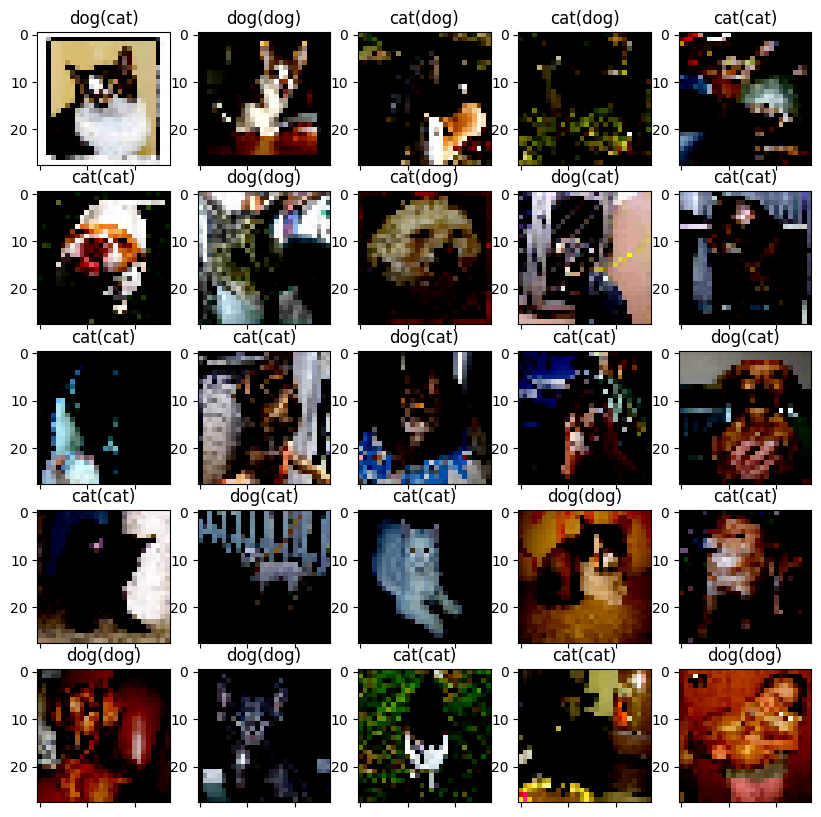

In [23]:
# finally visualize it
x_test = np.concatenate([x for x, y in ds_test], axis=0)
y_test = np.concatenate([y for x, y in ds_test], axis=0)

test_pred = model.predict(x_test)

for idx, elem in enumerate(ds_test.take(25)):
    pred_idx = np.argmax(test_pred[idx])
    true_idx = np.argmax(y_test[idx])
    plt.subplot(5, 5, idx + 1, title=(class_name[pred_idx] + "(" + class_name[true_idx] + ")"))
    plt.imshow(elem[0][0].numpy().reshape((28, 28, 3)))

219/219 [==============================] - 0s 2ms/step


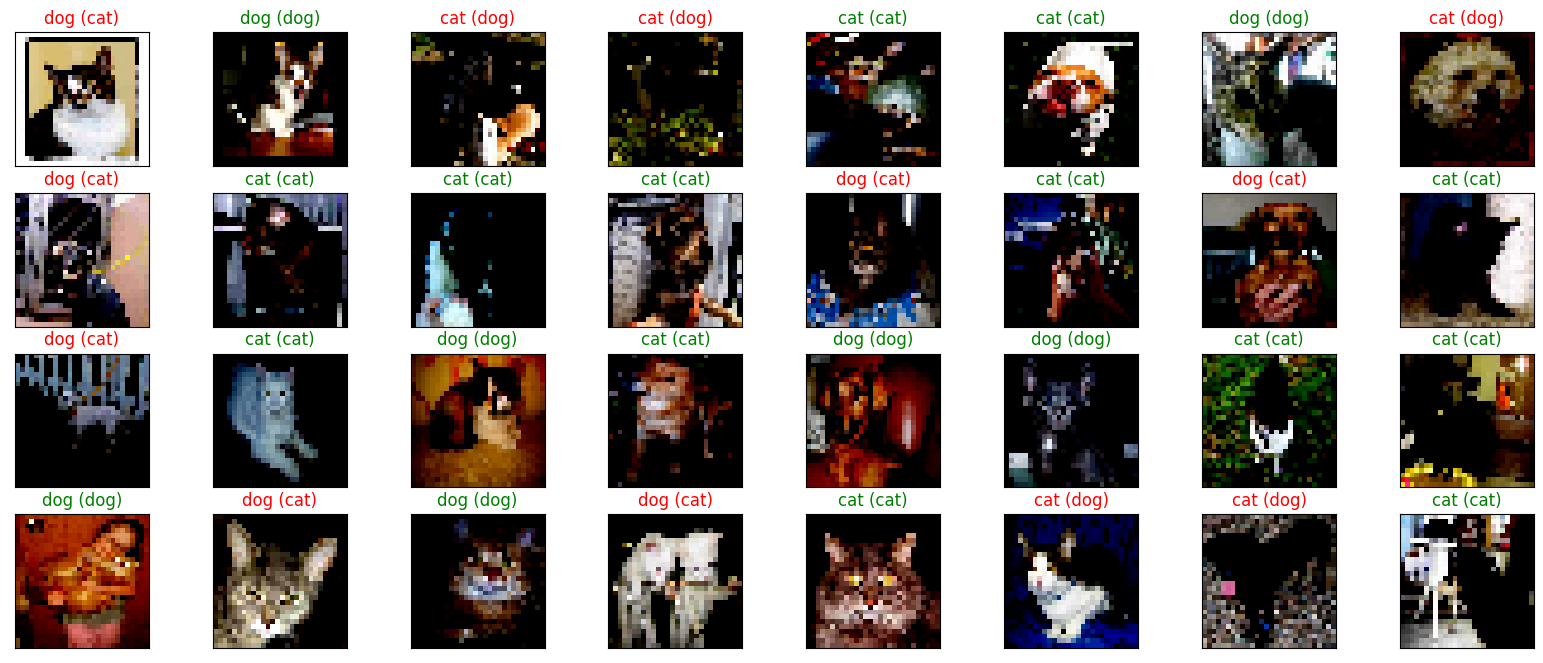

In [24]:
from matplotlib import pyplot

test_pred = model.predict(x_test)
fig = pyplot.figure(figsize=(20, 8))

for idx, elem in enumerate(ds_test.take(32)):
    ax = fig.add_subplot(4, 8, idx + 1, xticks=[], yticks=[])
    ax.imshow(elem[0][0].numpy().reshape((28, 28, 3)))
    pred_idx = np.argmax(test_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(class_name[pred_idx], class_name[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))
pyplot.show()